# Visualization HW

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_data = pd.read_csv(url, index_col=0)

# check imported data
covid_data.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [205]:
# For Viz 1, filter only Utah data and melt the DataFrame to long format

# Find the index of the first date column named '1/22/20'
date_column_start_index = covid_data_utah.columns.get_loc('1/22/20')

# Now use this index to select all date columns
date_columns = covid_data_utah.columns[date_column_start_index:]

# Melt the DataFrame to get it in a long format where each row corresponds to a single date for a single county
covid_data_utah_long = pd.melt(covid_data_utah,
                               id_vars=['Admin2'],
                               value_vars=date_columns,
                               var_name='Date',
                               value_name='Cases')

# Convert the 'Date' column to datetime objects for better handling in time series
covid_data_utah_long['Date'] = pd.to_datetime(covid_data_utah_long['Date'], format='%m/%d/%y')

# Pivot the table to get counties as columns and dates as rows
Covid_data_Utah_Counties = covid_data_utah_long.pivot(index='Date', columns='Admin2', values='Cases')

# Reset the index to make 'Date' a column again, if necessary
Covid_data_Utah_Counties.reset_index(inplace=True)

# Check if the DataFrame 'Covid_data_Utah_Counties' is now in the desired format.
Covid_data_Utah_Counties.head()

Admin2,Date,Bear River,Beaver,Box Elder,Cache,Carbon,Central Utah,Daggett,Davis,Duchesne,...,Tooele,TriCounty,Uintah,Unassigned,Utah,Wasatch,Washington,Wayne,Weber,Weber-Morgan
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


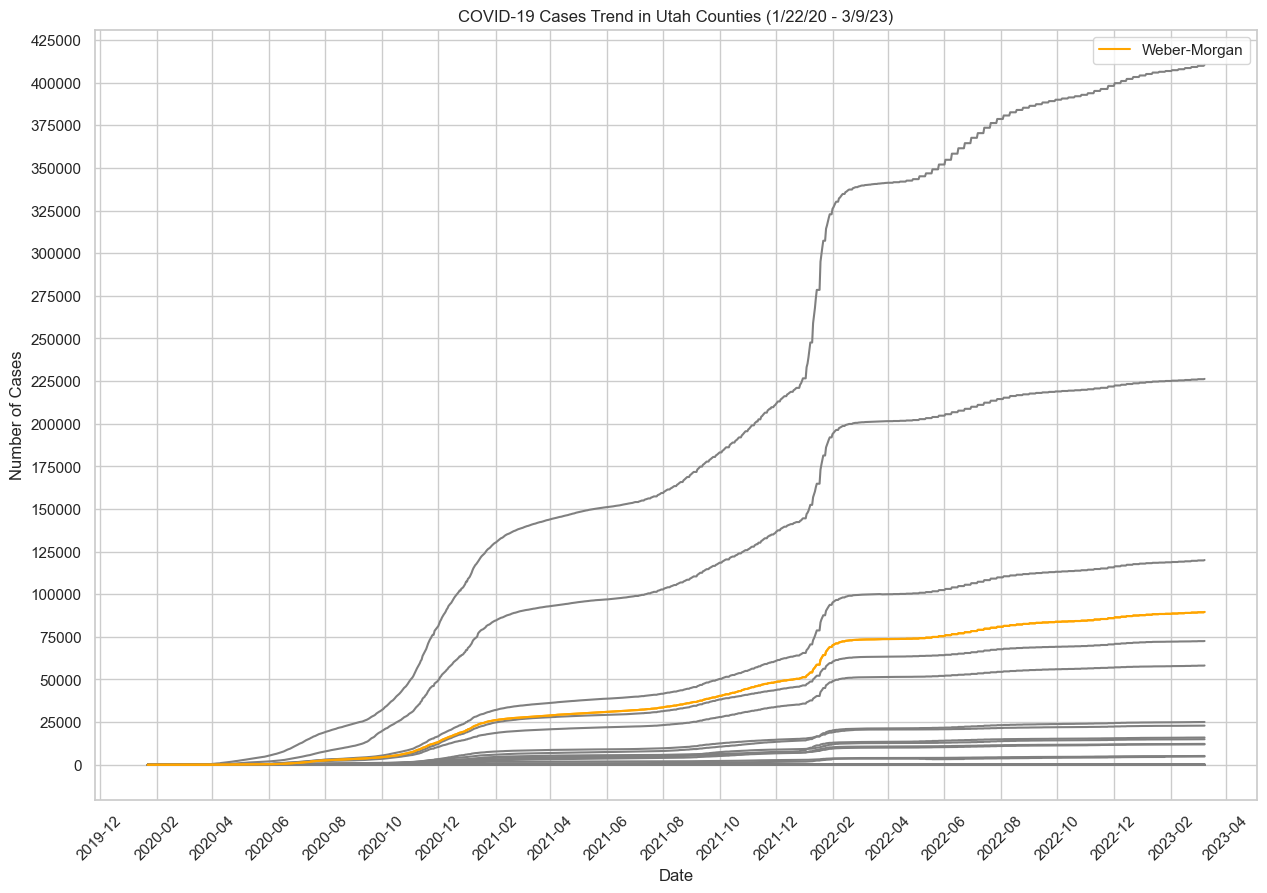

In [206]:
# visualization 1

import matplotlib.dates as mdates

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Convert the DataFrame to a long format
long_df = Covid_data_Utah_Counties.melt(id_vars='Date', var_name='County', value_name='Cases')

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the time series for each county in grey
sns.lineplot(x='Date', y='Cases', hue='County', data=long_df, palette=['grey' if county != long_df['County'].iloc[-1] else 'orange' for county in long_df['County'].unique()], legend=False)

# Highlight the selected county in orange
selected_county = Covid_data_Utah_Counties.columns[-1]  # Taking the last county as an example
sns.lineplot(x='Date', y='Cases', data=long_df[long_df['County'] == selected_county], color='orange', label=selected_county)

# Add title and labels
plt.title('COVID-19 Cases Trend in Utah Counties (1/22/20 - 3/9/23)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

# Set y-axis major ticks to a regular interval of 25,000 cases
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(25000))

# Set x-axis major ticks to a regular interval of 2 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the legend for the highlighted county
plt.legend()

# Show the plot
plt.show()

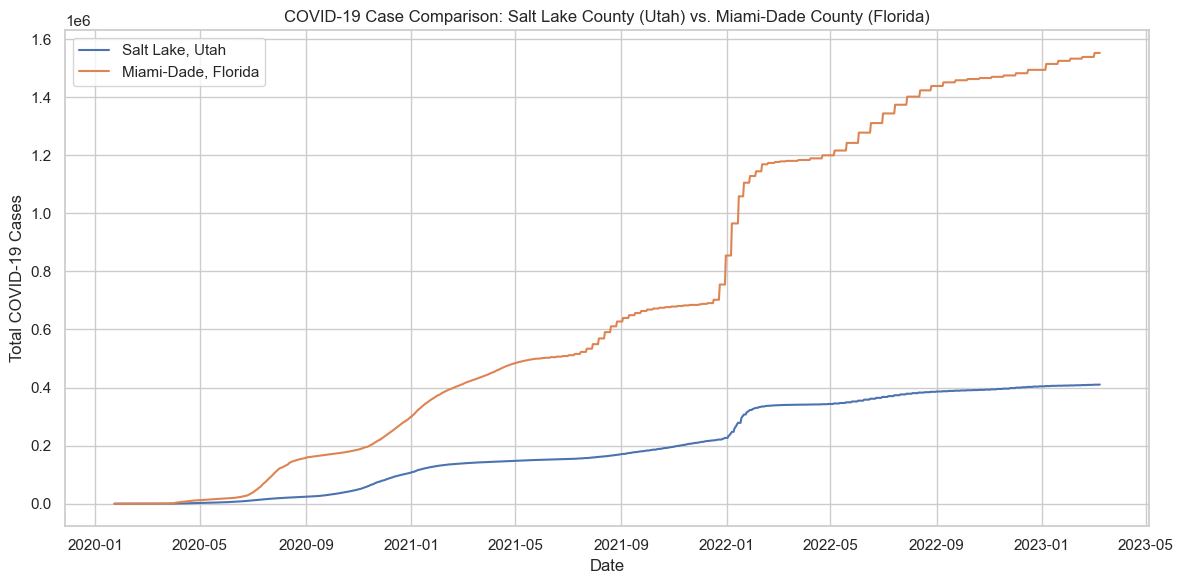

In [207]:
# visualization 2

# Filter for Utah and Florida
utah_df = covid_data[covid_data['Province_State'] == 'Utah']
florida_df = covid_data[covid_data['Province_State'] == 'Florida']

# Find the county with the most cases in the latest available date
latest_date = covid_data.columns[-1]  # Since the last column is the latest date available

utah_max_cases_county = utah_df[utah_df[latest_date] == utah_df[latest_date].max()]
florida_max_cases_county = florida_df[florida_df[latest_date] == florida_df[latest_date].max()]

# Extract the relevant data for plotting
utah_county_name = utah_max_cases_county.iloc[0]['Admin2']
florida_county_name = florida_max_cases_county.iloc[0]['Admin2']

utah_cases_timeline = utah_max_cases_county.iloc[0][covid_data.columns[11:]]  # excluding non-date columns
florida_cases_timeline = florida_max_cases_county.iloc[0][covid_data.columns[11:]]

# Date format as 'MM/DD/YY'
date_format = '%m/%d/%y'

# Prepare data for plotting with specified date format
plot_data = pd.DataFrame({
    'Date': pd.to_datetime(covid_data.columns[11:], format=date_format),
    utah_county_name: utah_cases_timeline.values,
    florida_county_name: florida_cases_timeline.values
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(plot_data['Date'], plot_data[utah_county_name], label=utah_county_name + ', Utah')
plt.plot(plot_data['Date'], plot_data[florida_county_name], label=florida_county_name + ', Florida')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.title('COVID-19 Case Comparison: {} County (Utah) vs. {} County (Florida)'.format(utah_county_name, florida_county_name))
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

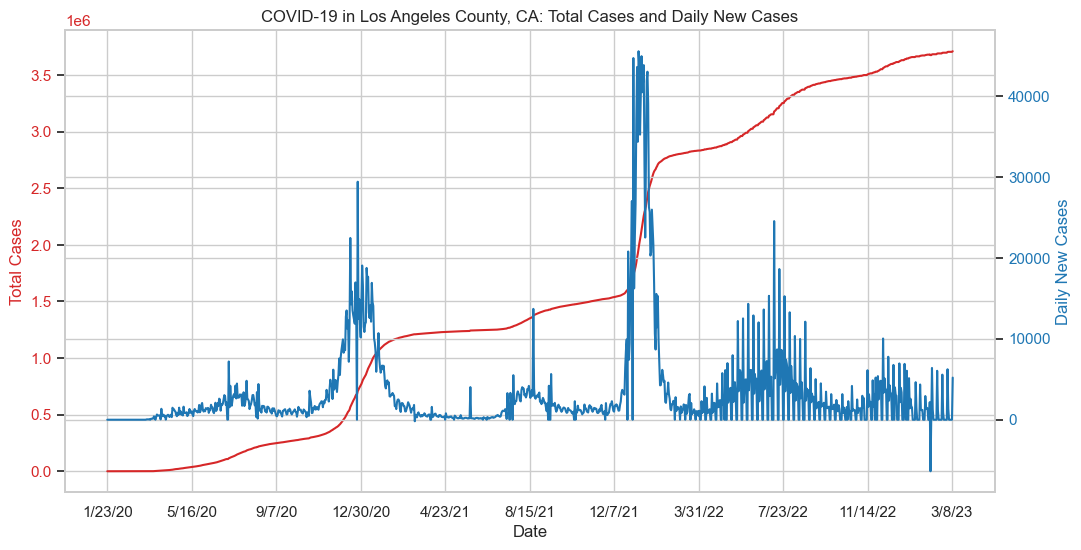

In [208]:
# visualization 3

# Selecting a specific county (Los Angeles County in California for this example)
county_df =  covid_data[( covid_data['Province_State'] == 'California') & ( covid_data['Admin2'] == 'Los Angeles')]

# Extracting the time series data for the county
date_columns =  covid_data.columns[11:]  # Since the date columns start from the 12th column
time_series = county_df[date_columns].iloc[0]

# Calculate daily new cases (difference between each day)
daily_new_cases = time_series.diff().fillna(0)

# Creating a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.plot(time_series.index, time_series, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Daily New Cases', color=color)
ax2.plot(daily_new_cases.index, daily_new_cases, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Formatting the date on the x-axis for better readability
ax1.set_xticks(range(0, len(date_columns), len(date_columns) // 10))  # Adjust the step as needed
ax1.set_xticklabels([date_columns[i] for i in ax1.get_xticks()])

plt.title('COVID-19 in Los Angeles County, CA: Total Cases and Daily New Cases')
plt.show()

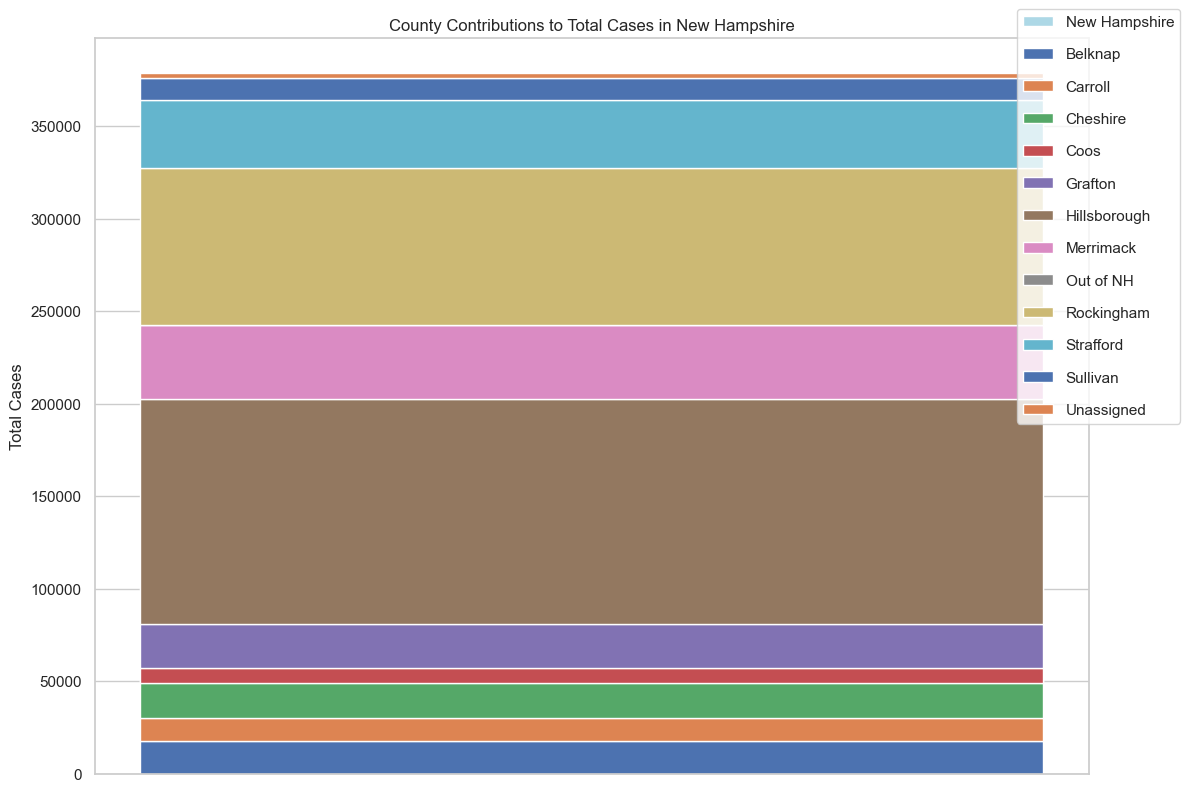

In [209]:
# visualization 4

# Choose the state (for example, New Hampshire)
state_name = 'New Hampshire'

# Filter the DataFrame for the selected state
state_df = covid_data[covid_data['Province_State'] == state_name]

# Extract county names and total cases for the selected state
county_names = state_df['Admin2']
total_cases = state_df.iloc[:, -1]  # Since the last column is the latest date

# Create a stacked bar chart with adjusted figure size and bottom margin
plt.figure(figsize=(12, 8))
plt.bar(state_name, total_cases, color='lightblue', label=state_name)

# Loop through county names and add them as stacked components
bottom = None
for county, cases in zip(county_names, total_cases):
    plt.bar(state_name, cases, bottom=bottom, label=county)
    if bottom is None:
        bottom = cases
    else:
        bottom += cases

# Plotting
plt.ylabel('Total Cases')
plt.title('County Contributions to Total Cases in {}'.format(state_name))
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), labelspacing=1.2)  # Adjusted legend placement
plt.xticks([])  # Remove x-ticks as they are not needed

# Plot margins and layout
plt.subplots_adjust(bottom=0.2) 
plt.tight_layout()

# show plot
plt.show()

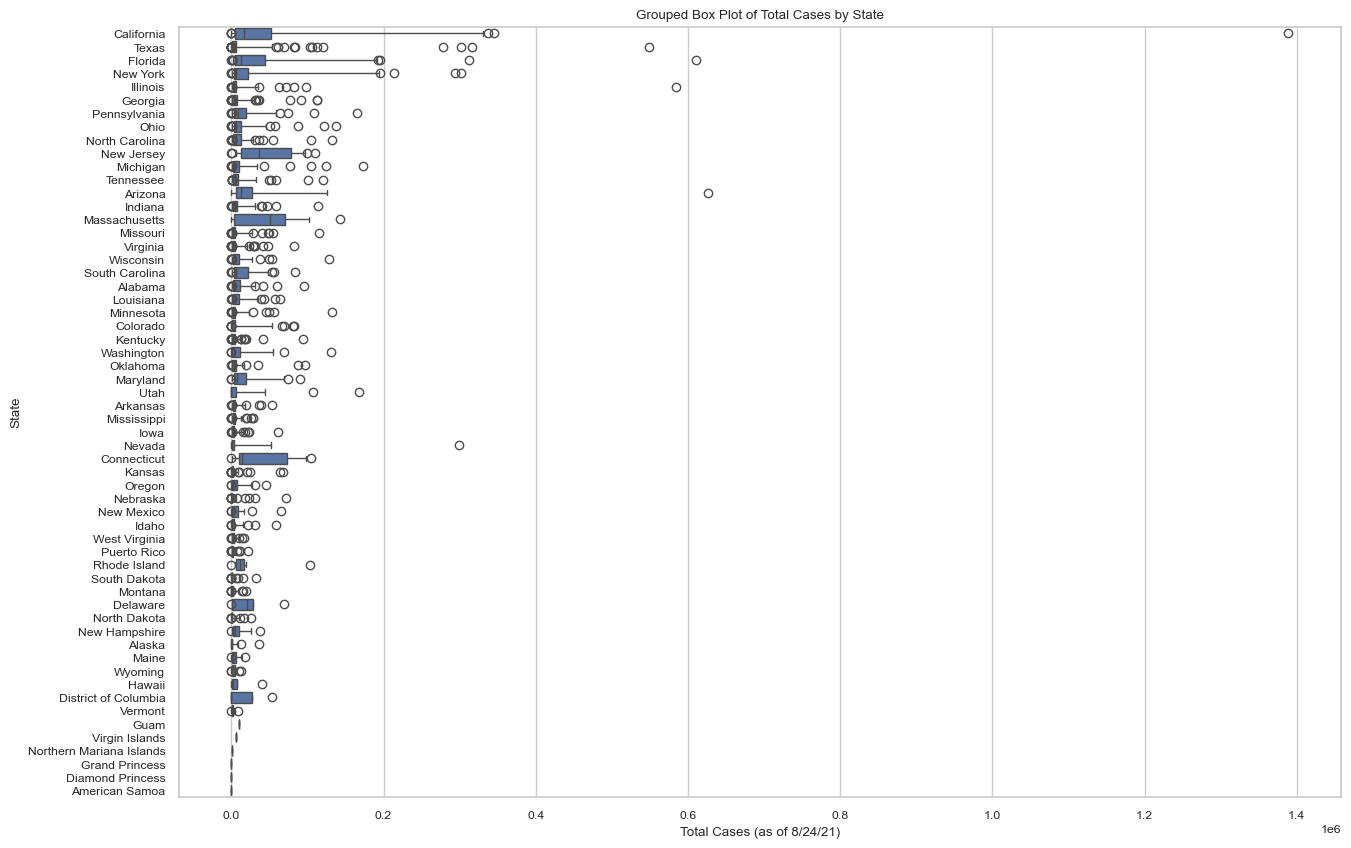

In [210]:
# visualization 5

# Sort states by the number of cases (from most to fewest)
sorted_states = covid_data.groupby('Province_State')['8/24/21'].sum().sort_values(ascending=False).index

# Create a figure
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid", font_scale=0.8)  # Reduce font scale to fit more items

# Create a grouped box plot using Seaborn
ax = sns.boxplot(
    x='8/24/21',
    y='Province_State',
    data=covid_data,
    order=sorted_states,
    whis=[5, 95]
)

# Adding labels and title
plt.xlabel('Total Cases (as of 8/24/21)')
plt.ylabel('State')
plt.title('Grouped Box Plot of Total Cases by State')

# Show the plot
plt.show()